# Surprise Housing -  Assignment 

**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price**

### The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

## Importing Required Librarys 

In [3]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.shape

(1460, 81)

In [6]:
data.drop(['Id'],axis=1,inplace=True)## No need of Id column

# EDA

## Handling null values

In [7]:
data.isnull().sum()[data.isnull().sum() > 0] ##total null values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Removing columns with High Null Values

In [8]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [9]:
data.isnull().sum()[data.isnull().sum() > 0]## null values remaining after removing high null values columns 

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

###  Treating the null values
1. dividing categorical nulls and numrical nulls 
2. *numerical columns* : MasVnrArea , GarageYrBlt
3. *categorical variable* :MasVnrType, BsmtQual ,BsmtCond ,BsmtExposure , BsmtFinType1 ,BsmtFinType2 ,   Electrical,GarageType,GarageFinish,GarageQual ,GarageCond 
     

### Treating Numerical values 

In [10]:
data[["MasVnrArea","GarageYrBlt"]].describe()

,MasVnrArea,GarageYrBlt
count,1452.000000,1379.000000
mean,103.685262,1978.506164
std,181.066207,24.689725
min,0.000000,1900.000000
25%,0.000000,1961.000000
50%,0.000000,1980.000000
75%,166.000000,2002.000000
max,1600.000000,2010.000000


In [11]:
data['MasVnrArea']= data.MasVnrArea.fillna(data.MasVnrArea.median())    # we can see the max value as 1600 and 75 percentaile is 166 
                                                                        #  so definetly there are outliers so its better to use median
data['GarageYrBlt']= data.GarageYrBlt.fillna(data.GarageYrBlt.mean())  # No outliers are there its better go with mean 


### Treating Categorical values 

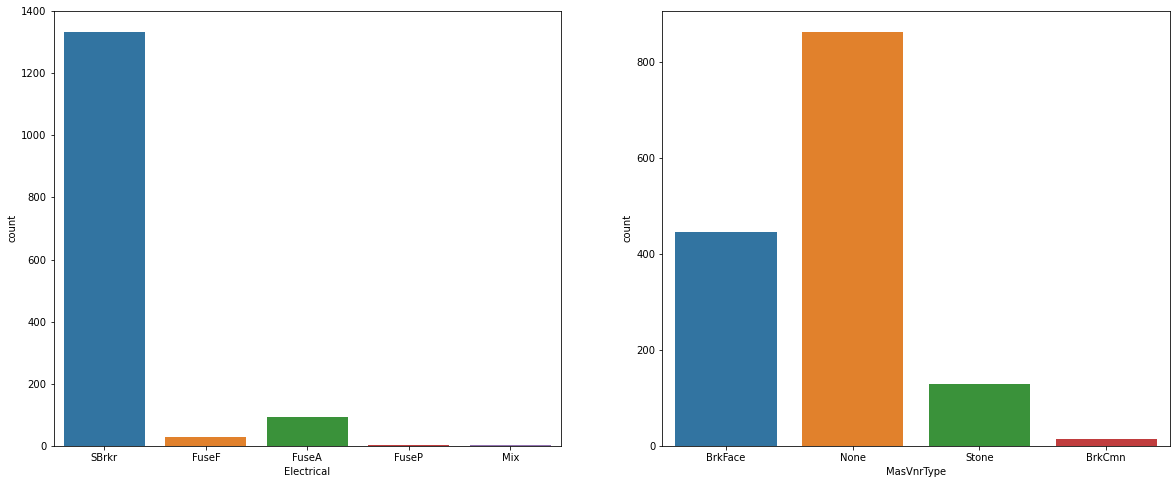

In [12]:
# Visualising the variables wih missing values
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.countplot(x = 'Electrical',  data = data)
plt.subplot(1,2,2)
sns.countplot(x = 'MasVnrType', data = data)
plt.show()

##### 1. For Garage with NA we need to replace with No Garage
##### 2. For Basment also with  NA we need to replace with No Basement
##### 3.For Electrical and MasVnrType we can replace null values with mode value 


In [13]:
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr') 
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None')
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan, 'No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan, 'No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan, 'No Basement')
data['BsmtCond'] = data['BsmtCond'].replace(np.nan, 'No Basement')
data['BsmtQual'] = data['BsmtQual'].replace(np.nan, 'No Basement')

In [14]:
data.isnull().sum()[data.isnull().sum() > 0] ## no null values 

Series([], dtype: int64)

## Univariate analysis 
#### Flitering the feature which are required

In [15]:
Categorical_columns = data.select_dtypes(include=['object'])
Categorical_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

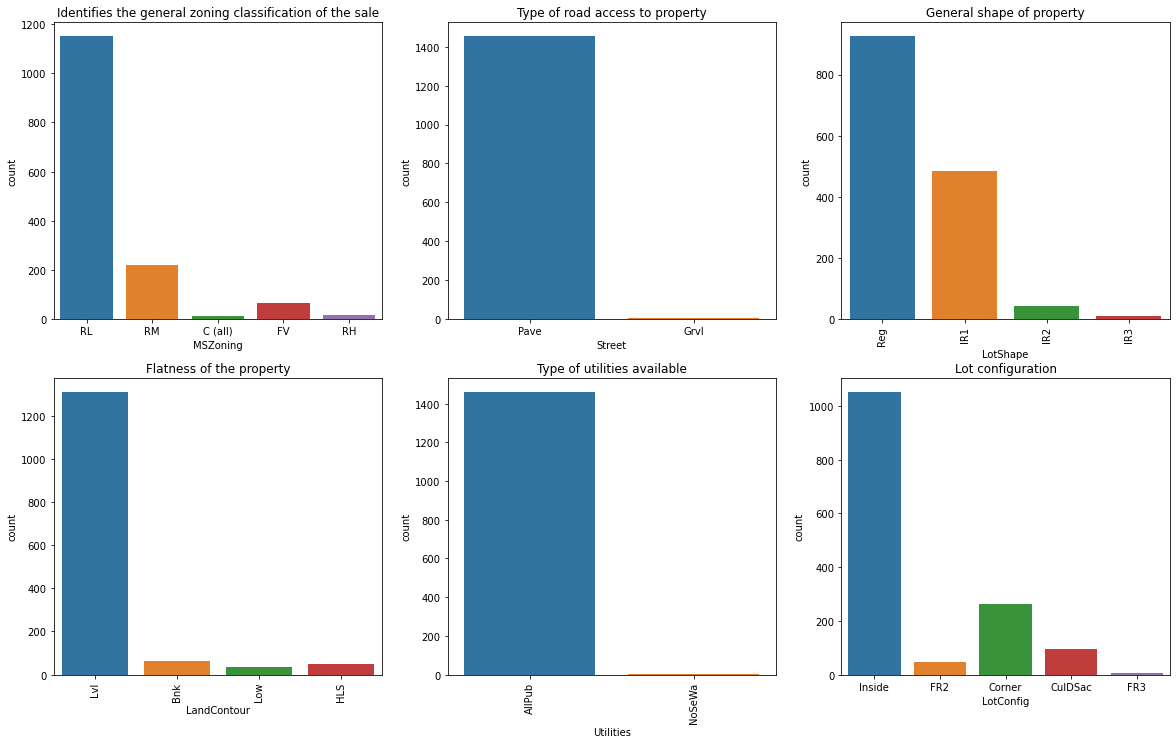

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Identifies the general zoning classification of the sale")
sns.countplot(x = 'MSZoning',  data = data)

plt.subplot(2,3,2)
plt.title("Type of road access to property")
sns.countplot(x = 'Street', data = data)

plt.subplot(2,3,3)
plt.title("General shape of property")
sns.countplot(x = 'LotShape', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title("Flatness of the property")
sns.countplot(x = 'LandContour', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title("Type of utilities available")
sns.countplot(x = 'Utilities',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
plt.title("Lot configuration")
sns.countplot(x = 'LotConfig', data = data)
plt.show()

### Note 1 : We will Remove the feature with highly biased colums which will effect our assumtions like street and Utilities

In [17]:
# Dropping highly biased features 
data.drop(['Utilities','Street','LandContour'],axis=1,inplace=True)

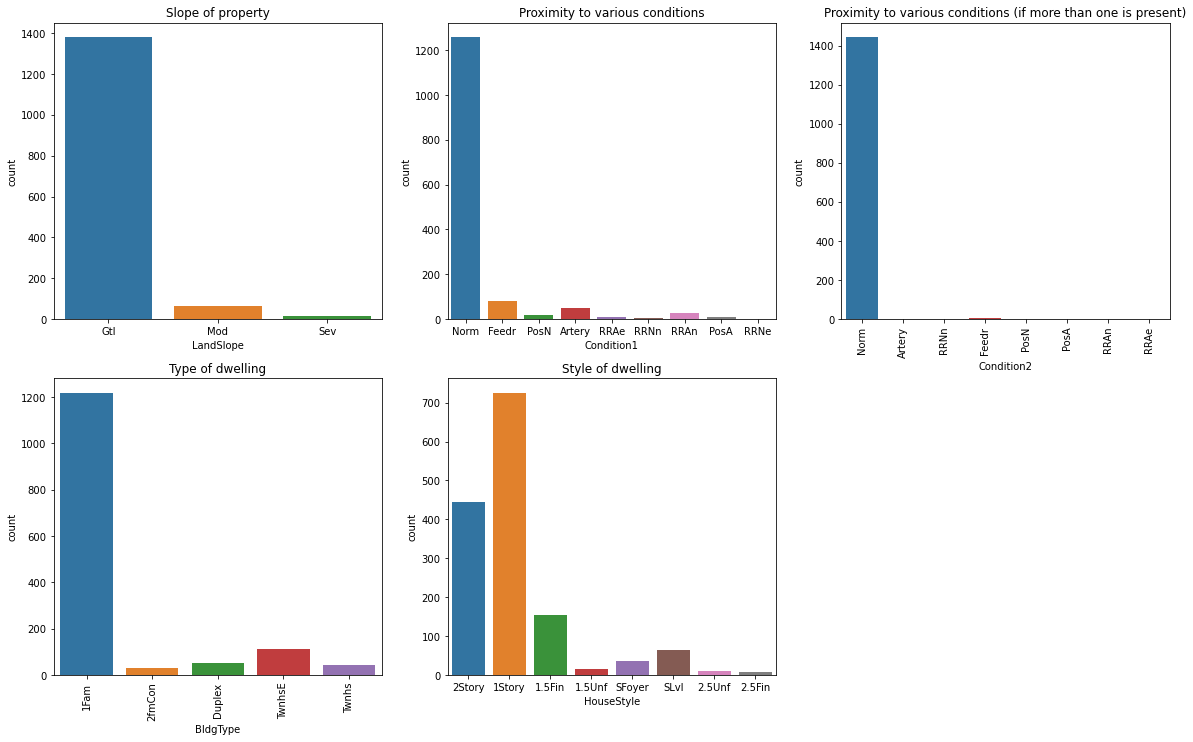

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Slope of property")
sns.countplot(x = 'LandSlope',  data = data)

plt.subplot(2,3,2)
plt.title("Proximity to various conditions")
sns.countplot(x = 'Condition1', data = data)

plt.subplot(2,3,3)
plt.title("Proximity to various conditions (if more than one is present)")
sns.countplot(x = 'Condition2', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title("Type of dwelling")
sns.countplot(x = 'BldgType',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title("Style of dwelling")
sns.countplot(x = 'HouseStyle', data = data)


plt.show()

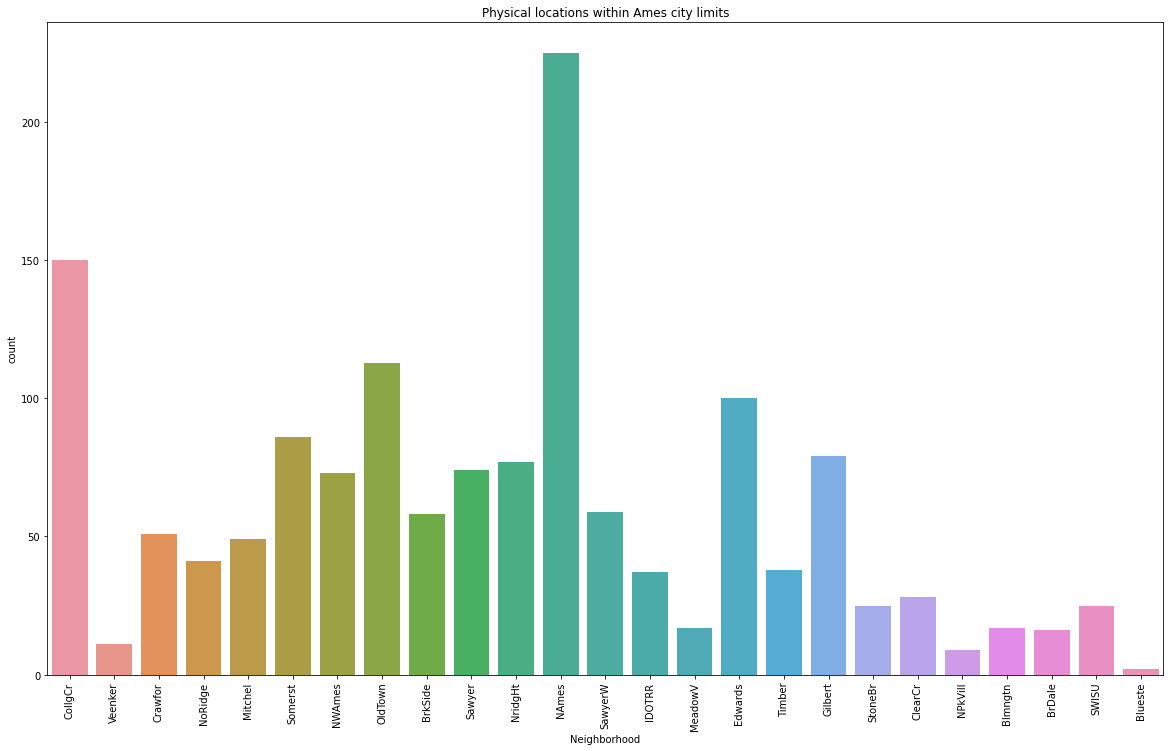

In [19]:
plt.figure(figsize=(20, 12))
plt.title("Physical locations within Ames city limits")
sns.countplot(x = 'Neighborhood', data = data)
plt.xticks(rotation=90)
plt.show()

In [20]:
# Dropping highly biased features 
data.drop(['Condition2','Condition1','LandSlope'],axis=1,inplace=True)

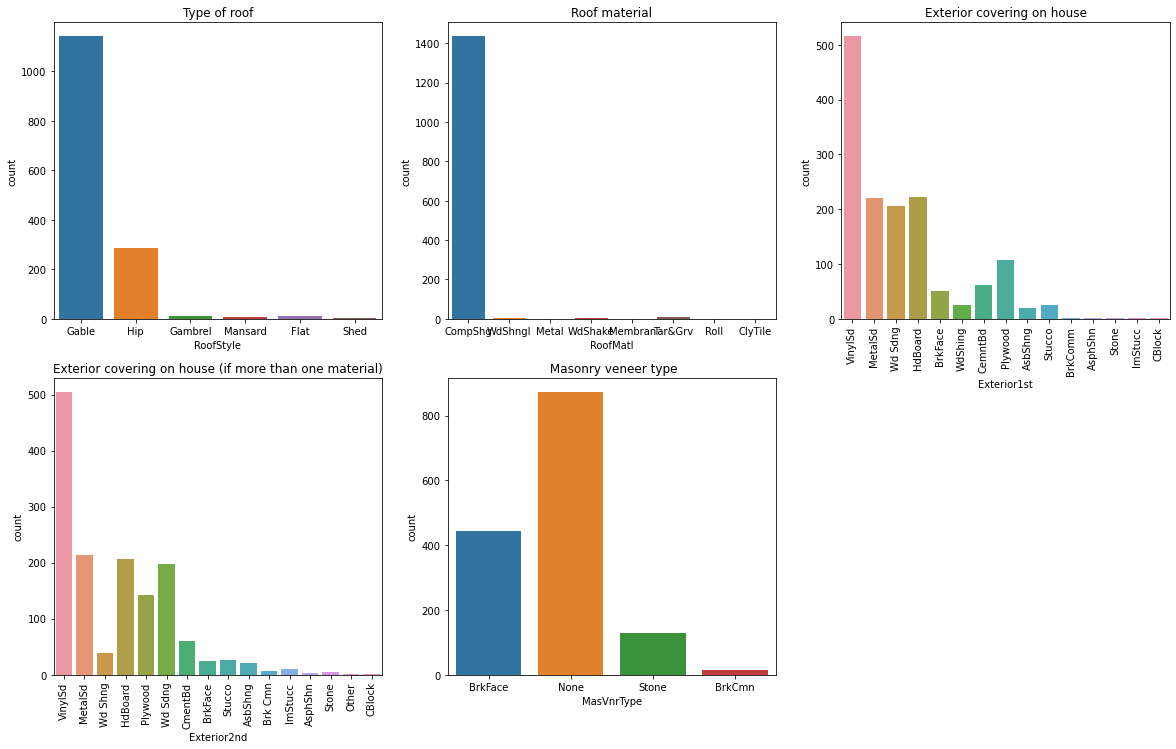

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Type of roof")
sns.countplot(x = 'RoofStyle',  data = data)

plt.subplot(2,3,2)
plt.title("Roof material")
sns.countplot(x = 'RoofMatl', data = data)

plt.subplot(2,3,3)
plt.title("Exterior covering on house")
sns.countplot(x = 'Exterior1st', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title("Exterior covering on house (if more than one material)")
sns.countplot(x = 'Exterior2nd',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title(" Masonry veneer type")
sns.countplot(x = 'MasVnrType', data = data)


plt.show()

In [22]:
# Dropping highly biased features 
data.drop(['RoofMatl'],axis=1,inplace=True)

<AxesSubplot:title={'center':' Masonry veneer type'}, xlabel='Foundation', ylabel='count'>

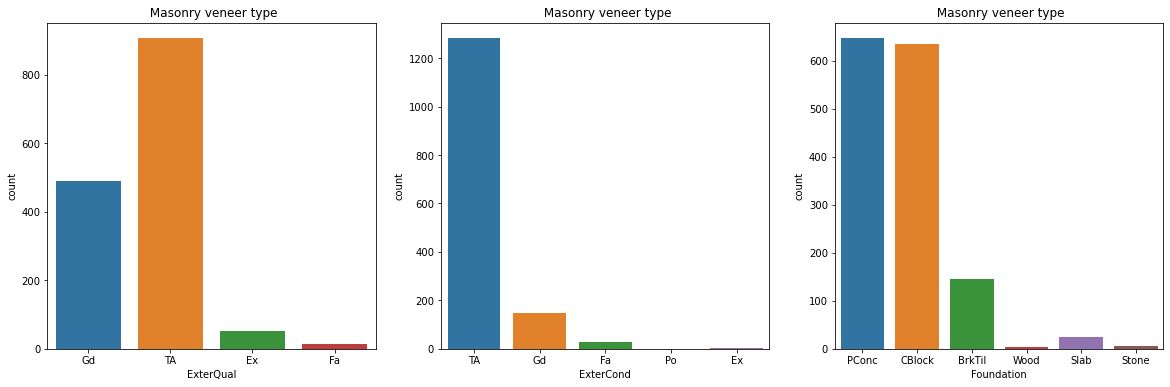

In [23]:

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title(" Masonry veneer type")
sns.countplot(x = 'ExterQual', data = data)


plt.subplot(1,3,2)
plt.title(" Masonry veneer type")
sns.countplot(x = 'ExterCond', data = data)


plt.subplot(1,3,3)
plt.title(" Masonry veneer type")
sns.countplot(x = 'Foundation', data = data)

In [24]:
# Dropping highly biased features 
data.drop(['ExterCond'],axis=1,inplace=True)

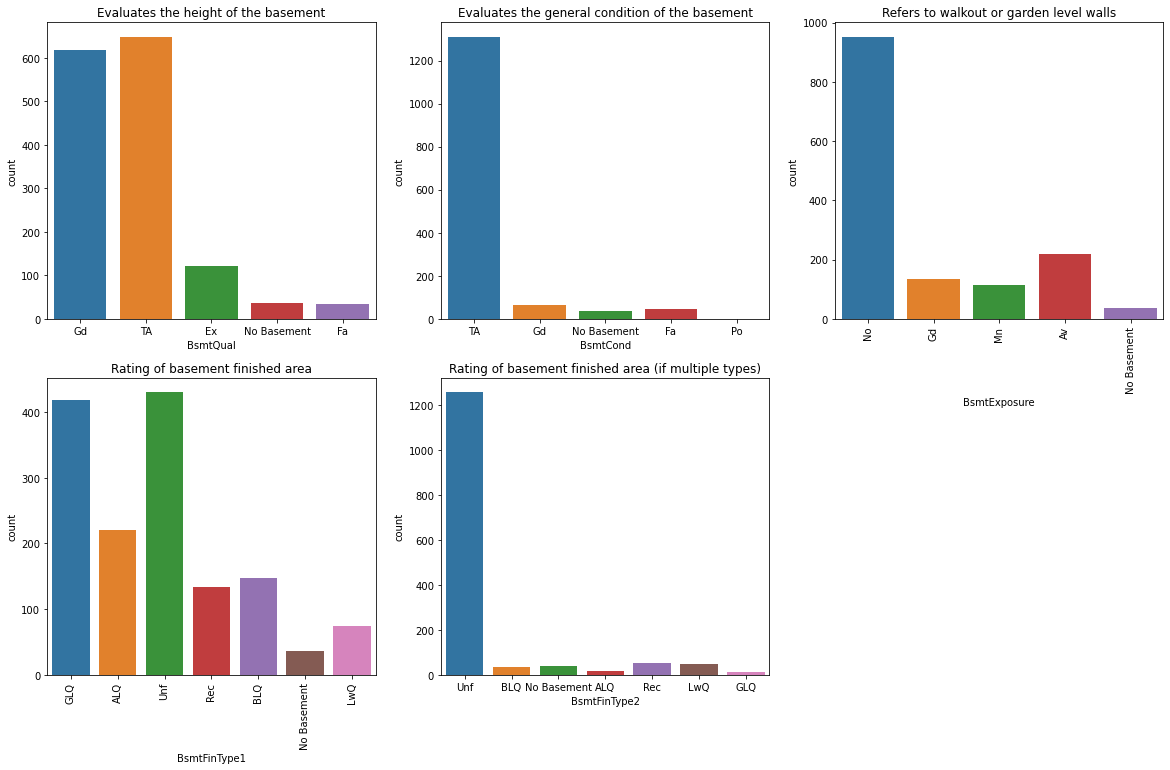

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Evaluates the height of the basement")
sns.countplot(x = 'BsmtQual',  data = data)

plt.subplot(2,3,2)
plt.title("Evaluates the general condition of the basement")
sns.countplot(x = 'BsmtCond', data = data)

plt.subplot(2,3,3)
plt.title("Refers to walkout or garden level walls")
sns.countplot(x = 'BsmtExposure', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title("Rating of basement finished area")
sns.countplot(x = 'BsmtFinType1',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title("Rating of basement finished area (if multiple types)")
sns.countplot(x = 'BsmtFinType2', data = data)


plt.show()

In [26]:
# Dropping highly biased features 
data.drop(['BsmtCond','BsmtFinType2'],axis=1,inplace=True)

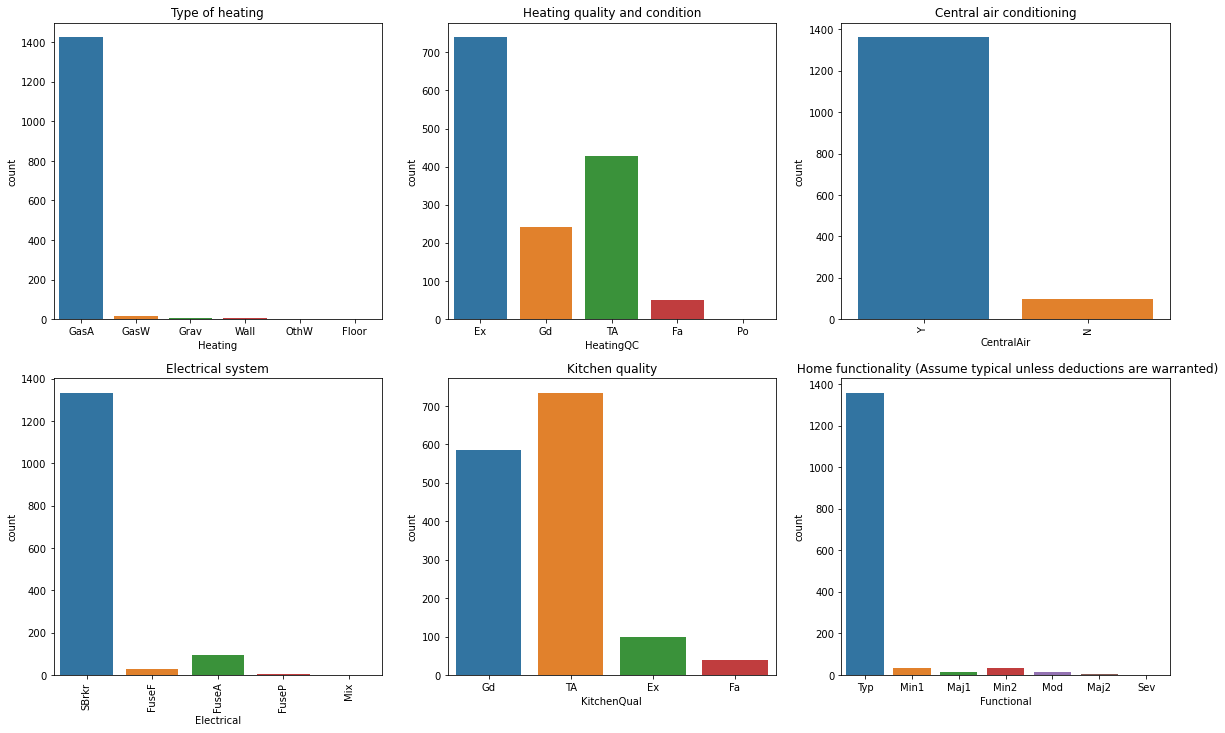

In [27]:
#'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional'

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Type of heating")
sns.countplot(x = 'Heating',  data = data)

plt.subplot(2,3,2)
plt.title("Heating quality and condition")
sns.countplot(x = 'HeatingQC', data = data)


plt.subplot(2,3,3)
plt.title("Central air conditioning")
sns.countplot(x = 'CentralAir', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title("Electrical system")
sns.countplot(x = 'Electrical',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title("Kitchen quality")
sns.countplot(x = 'KitchenQual', data = data)

plt.subplot(2,3,6)
plt.title(" Home functionality (Assume typical unless deductions are warranted)")
sns.countplot(x = 'Functional', data = data)

plt.show()

In [28]:
# Dropping highly biased features 
data.drop(['Heating','CentralAir','Electrical','Functional'],axis=1,inplace=True)

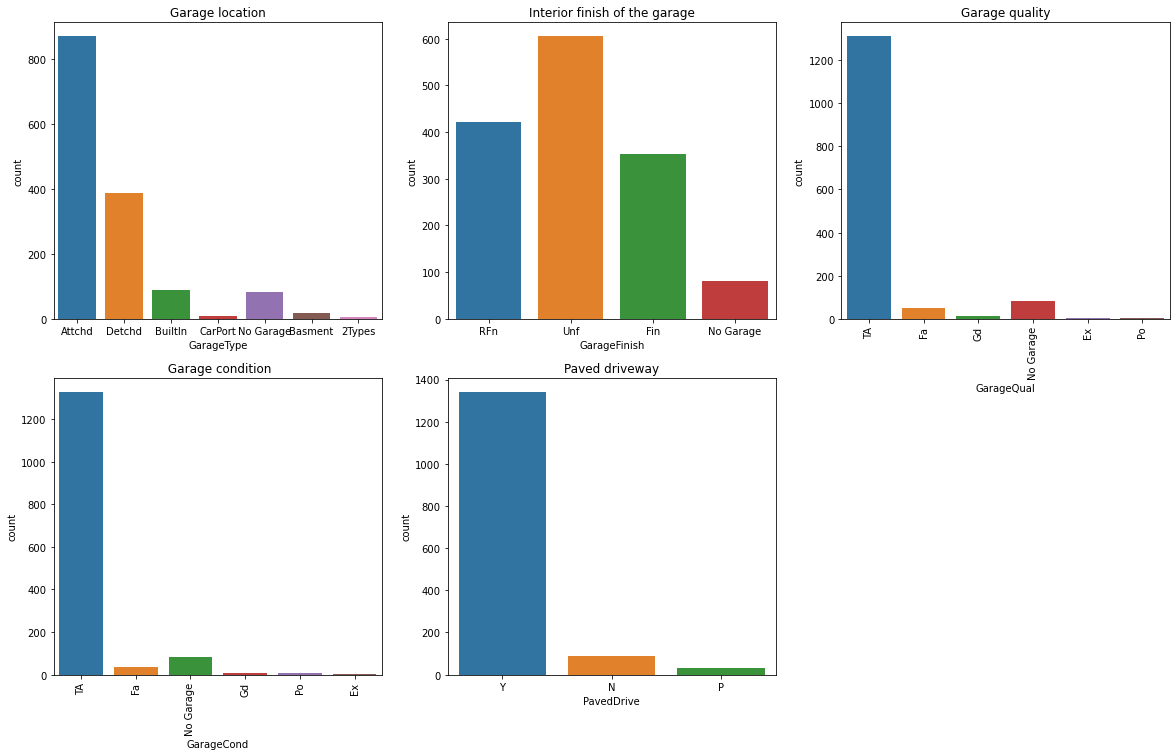

In [29]:
## 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive'


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title("Garage location")
sns.countplot(x = 'GarageType',  data = data)

plt.subplot(2,3,2)
plt.title("Interior finish of the garage")
sns.countplot(x = 'GarageFinish', data = data)


plt.subplot(2,3,3)
plt.title("Garage quality")
sns.countplot(x = 'GarageQual', data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.title(" Garage condition")
sns.countplot(x = 'GarageCond',  data = data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.title("Paved driveway")
sns.countplot(x = 'PavedDrive', data = data)

plt.show()

In [30]:
# Dropping highly biased features 
data.drop(['GarageQual','GarageCond','PavedDrive'],axis=1,inplace=True)

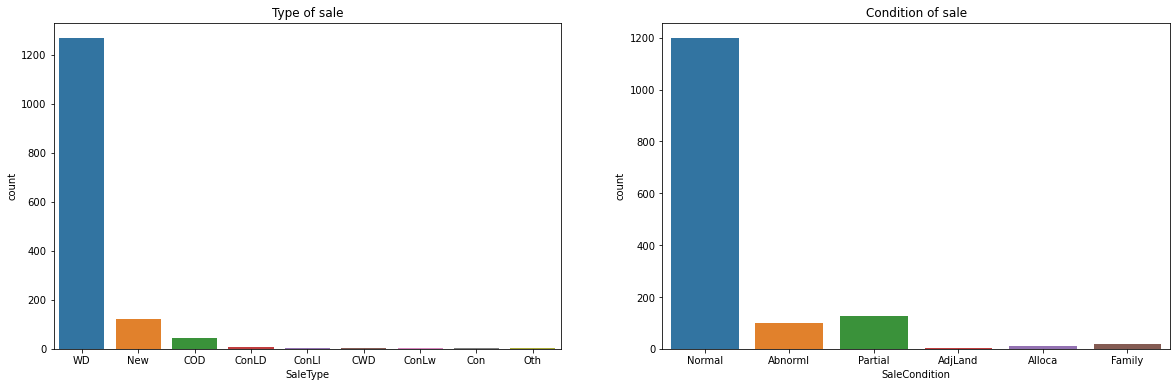

In [31]:
#'SaleType', 'SaleCondition'
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.title("Type of sale")
sns.countplot(x = 'SaleType',  data = data)

plt.subplot(1,2,2)
plt.title("Condition of sale")
sns.countplot(x = 'SaleCondition', data = data)
plt.show()

In [32]:
# Dropping highly biased features 
data.drop(['SaleType'],axis=1,inplace=True)

### Derived Feature 

In [33]:
data['YearsSinceRemodel'] = 2010 - ((data['YearRemodAdd'] - data['YearBuilt']) + data['YearBuilt']) #feature engineering

### numerical to categorical 

In [34]:
#changing numerical to categorical  
data['MSSubClass']=data['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

data['OverallQual']=data['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
data['OverallCond']=data['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

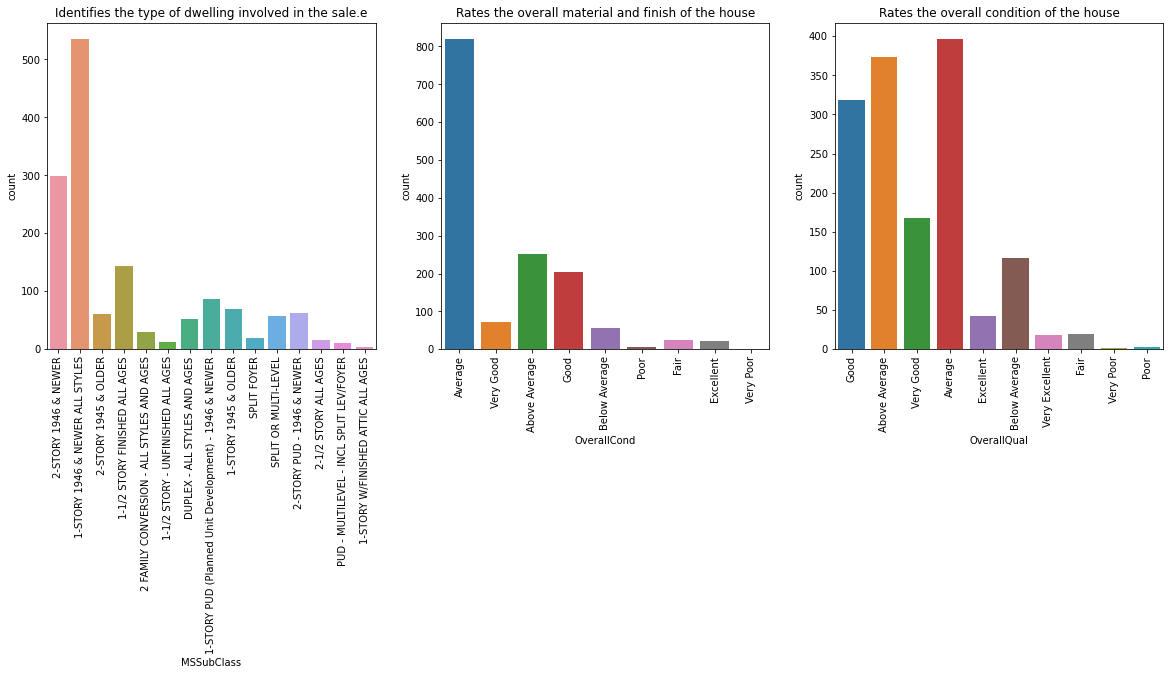

In [35]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Identifies the type of dwelling involved in the sale.e")
sns.countplot(x = 'MSSubClass',  data = data)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
plt.title("Rates the overall material and finish of the house")
sns.countplot(x = 'OverallCond', data = data)
plt.xticks(rotation=90)


plt.subplot(1,3,3)
plt.title("Rates the overall condition of the house")
sns.countplot(x = 'OverallQual', data = data)
plt.xticks(rotation=90)
plt.show()

In [36]:
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #we no need of years as we already derived a feature from th

In [37]:
numerical_columns = data.select_dtypes(include=['int64','float64'])
numerical_columns.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'YearsSinceRemodel'],
      dtype='object')

In [38]:
numerical_columns[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd']].describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808
std,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000
50%,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000
75%,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000
max,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000


In [39]:
numerical_columns[['Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'YearsSinceRemodel']].describe()

,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearsSinceRemodel
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,25.134247
std,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,20.645407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,6.000000
50%,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,16.000000
75%,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,43.000000
max,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,60.000000


### Note :  Here We are able to see some columns are having high outliers and maximum data is also 0 so we can drop some columns 

In [40]:
data.drop(['BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',"LowQualFinSF"],axis=1,inplace=True)
##inthese colomns 75 persentile of data is 0 so we droped these columns 

In [41]:
# correlation matrix
numerical_columns = data.select_dtypes(include=['int64','float64'])
cor = numerical_columns.corr()
cor.style.background_gradient(cmap="Greens")

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearsSinceRemodel
LotArea,1.000000,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.001205,0.263843,-0.013788
MasVnrArea,0.103321,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.006723,0.472614,-0.176529
BsmtFinSF1,0.214103,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.015727,0.386420,-0.128451
BsmtUnfSF,-0.002618,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.034888,0.214479,-0.181133
TotalBsmtSF,0.260833,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.013196,0.613581,-0.291066
1stFlrSF,0.299475,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.031372,0.605852,-0.240379
2ndFlrSF,0.050986,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.035164,0.319334,-0.140024
GrLivArea,0.263116,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.050240,0.708624,-0.287389
BsmtFullBath,0.158155,0.083010,0.649212,-0.422900,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,0.179189,0.175315,0.067341,-0.025361,0.227122,-0.119470
BsmtHalfBath,0.048046,0.027403,0.067418,-0.095804,-0.000315,0.001956,-0.023855,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,-0.024536,0.040161,-0.025324,0.032873,-0.016844,0.012337


## Observations
**Sales price depend on the Living area , Basement area, Garage area Compared to other numerical variables**

## Dependend varaible data transformation

In [42]:
data['SalePrice'].describe()## cheaking the dependent variable 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

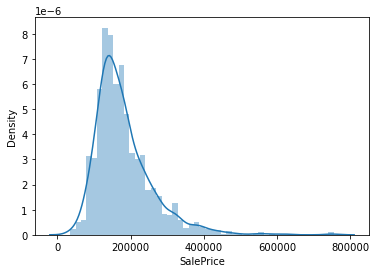

In [43]:
sns.distplot(data['SalePrice'])
plt.show()

In [44]:
print("Skewness: %f" % data['SalePrice'].skew()) ## skewness is high 

Skewness: 1.882876


In [45]:
data['SalePrice']=np.log(data.SalePrice) ## to reducess the skewness we applied log to the salesprice

In [46]:
data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

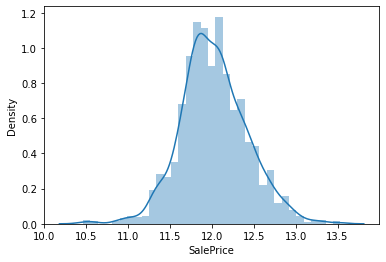

In [47]:
sns.distplot(data['SalePrice']) 

In [48]:
#skewness 
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 0.121335


In [49]:
data.shape

(1460, 46)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [50]:
# split into X and y
X = data.drop(['SalePrice'], axis=1) # predictors in variable X

y = data['SalePrice'] # response variable in Y

In [51]:
categorical = X.select_dtypes(include=['object'])
categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal


### Creating Dummy values 

In [52]:
# convert into dummies - one hot encoding
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [53]:
# drop categorical variables 
X = X.drop(list(categorical.columns), axis=1)

In [54]:
# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)

### Feature Scaling

In [55]:
numerical_columns = X.select_dtypes(include=['int64','float64'])

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[numerical_columns.columns] = scaler.fit_transform(X[numerical_columns.columns])

In [57]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [58]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.27127683210748
[ 1.40168312e-02 -2.11194677e-03 -6.45778432e-03  1.44061873e-02
 -2.43241293e-03  2.63527015e-02  5.17280083e-02  4.58645762e-02
  2.78331597e-02  7.63926505e-03  3.35021156e-02  2.16543736e-02
  1.47129847e-03 -2.74570674e-02  1.89259276e-02  1.79280767e-02
  4.01036473e-02  8.09098170e-03  1.11416775e-02 -3.43093256e-03
  2.94383077e-03 -2.20139982e-02  1.68389705e-01  9.19491973e-03
  1.53332833e-01  1.43234532e-01  4.66109725e-02  1.18120119e+12
  1.10498624e-01  1.58657945e-01  1.33102202e-01  1.17444626e-01
  2.34335318e+10  1.18081889e-01  1.75830296e-01  1.27923821e-01
  4.20088676e-01  4.20879187e-01  4.04288789e-01  3.69295457e-01
  2.44970432e-02 -7.68499626e-02  1.38527312e-02  4.99845823e-02
 -4.66155325e-02 -7.38047791e-02  5.14647285e-03  2.05844407e-02
  5.02856902e-03  9.87842107e-02  1.50086651e-01  8.49974751e-02
  1.93615146e-01 -2.25321052e-02  9.97189776e-02  3.59000309e-02
 -1.11166961e-01  4.77571821e-02  3.81106906e-02 -1.66092347e-02
  3.625

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_score of Train data : ", r2_train_lr.round(2))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_score of Test data :" ,r2_test_lr.round(2))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train data : ",rss1_lr.round(2))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test data : ",rss2_lr.round(2))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE of Train data :",mse_train_lr.round(2))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE of Test data :",mse_test_lr.round(2))
metric.append(mse_test_lr**0.5)

R2_score of Train data :  0.92
R2_score of Test data : -1.9412786173372034e+22
RSS of Train data :  12.44
RSS of Test data :  1.3990517594057902e+24
RMSE of Train data : 0.01
RMSE of Test data : 3.194182099099978e+21


## Ridge Regression

In [62]:

from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [64]:
#Fitting Ridge model for alpha = 7
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.01198253  0.00365067 -0.00638824  0.0074379   0.01351547  0.03506659
  0.05384493  0.03916687  0.02726084  0.00527214  0.03461549  0.02303816
  0.00443036 -0.02952606  0.02038429  0.02425891  0.04228359  0.00382959
  0.01138326 -0.00329132  0.00258069 -0.02947312  0.01493081 -0.08755736
  0.04451721  0.00687044 -0.00613759  0.00089378  0.02433296  0.03088492
 -0.00646401 -0.0398355   0.02990667 -0.03071397  0.02809474  0.00354368
  0.08068985  0.06709173  0.07739251  0.03708476  0.02499745 -0.06322788
  0.00764287  0.04753445 -0.03291635 -0.01878961 -0.00029691 -0.00429831
 -0.01883043  0.02125685  0.05135013  0.00082337  0.10263043 -0.09042555
 -0.00431083 -0.08799179 -0.07314404 -0.01525066 -0.02290967 -0.00644658
 -0.02242622  0.08224389  0.10653751 -0.05812247 -0.01089802 -0.04713691
  0.00495455  0.08819183  0.07826329 -0.00617364  0.03915257  0.00089378
  0.02990667 -0.05376819 -0.018062    0.01434368  0.01764809 -0.02163332
  0.01775814 -0.02456304 -0.0060402   0.00720802 -0

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_score of Train data : ", r2_train_lr.round(2))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_score of Test data :" ,r2_test_lr.round(2))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train data : ",rss1_lr.round(2))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test data : ",rss2_lr.round(2))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS of Train data :",mse_train_lr.round(2))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS of Test data :",mse_test_lr.round(2))
metric2.append(mse_test_lr**0.5)

R2_score of Train data :  0.91
R2_score of Test data : 0.88
RSS of Train data :  14.13
RSS of Test data :  8.9
MSS of Train data : 0.01
MSS of Test data : 0.02


## Lasso Regression

In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [68]:
#Fitting Lasso model for alpha = 0.001 

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [69]:
lasso.coef_

array([ 0.01019952,  0.00564074, -0.        ,  0.00906283,  0.02530196,
        0.02549366,  0.03616676,  0.0528955 ,  0.02760526,  0.00479058,
        0.03402641,  0.02261005,  0.00087395, -0.02902045,  0.02262022,
        0.02575495,  0.05223027,  0.        ,  0.01154541, -0.0009148 ,
        0.00189628, -0.03891912,  0.        , -0.10128729,  0.03478193,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.03548021,  0.        , -0.        ,  0.        ,
        0.        ,  0.02248623,  0.        ,  0.03860841, -0.        ,
        0.        , -0.0150153 ,  0.        ,  0.0428655 , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.02645878,  0.        ,  0.10638224, -0.08009845, -0.        ,
       -0.0820839 , -0.04212653,  0.        , -0.00274273, -0.        ,
       -0.        ,  0.05373177,  0.0941255 , -0.04947573, -0.        ,
       -0.02098799,  0.        ,  0.08372243,  0.02605802, -0.  

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_score of Train data : ", r2_train_lr.round(2))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_score of Test data :" ,r2_test_lr.round(2))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS of Train data : ",rss1_lr.round(2))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS of Test data : ",rss2_lr.round(2))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS of Train data :",mse_train_lr.round(2))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS of Test data :",mse_test_lr.round(2))
metric3.append(mse_test_lr**0.5)

R2_score of Train data :  0.9
R2_score of Test data : 0.87
RSS of Train data :  16.43
RSS of Test data :  9.42
MSS of Train data : 0.02
MSS of Test data : 0.02


In [71]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.225096e-01,0.911947,0.897633
1,R2 Score (Test),-1.941279e+22,0.876523,0.869237
2,RSS (Train),1.243661e+01,14.131826,16.429134
3,RSS (Test),1.399052e+24,8.898779,9.423887
4,MSE (Train),1.103667e-01,0.117648,0.126851
5,MSE (Test),5.651710e+10,0.142537,0.146682


## Coefficients after regularization

In [72]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,1.401683e-02,0.011983,0.010200
MasVnrArea,-2.111947e-03,0.003651,0.005641
BsmtFinSF1,-6.457784e-03,-0.006388,-0.000000
BsmtUnfSF,1.440619e-02,0.007438,0.009063
TotalBsmtSF,-2.432413e-03,0.013515,0.025302
1stFlrSF,2.635270e-02,0.035067,0.025494
2ndFlrSF,5.172801e-02,0.053845,0.036167
GrLivArea,4.586458e-02,0.039167,0.052895
BsmtFullBath,2.783316e-02,0.027261,0.027605
BsmtHalfBath,7.639265e-03,0.005272,0.004791


In [74]:
betas['Ridge'].sort_values(ascending=False).head(10)

OverallQual_Excellent    0.159897
OverallQual_Very Good    0.116297
Neighborhood_NridgHt     0.106538
Neighborhood_Crawfor     0.102630
Neighborhood_Somerst     0.088192
Neighborhood_NoRidge     0.082244
MSZoning_FV              0.080690
Neighborhood_StoneBr     0.078263
MSZoning_RL              0.077393
Exterior1st_BrkFace      0.072575
Name: Ridge, dtype: float64

In [75]:
betas['Lasso'].sort_values(ascending=False).head(10)

OverallQual_Excellent    0.208772
OverallQual_Very Good    0.127170
Neighborhood_Crawfor     0.106382
Neighborhood_NridgHt     0.094126
Neighborhood_Somerst     0.083722
BsmtExposure_Gd          0.066321
Exterior1st_BrkFace      0.059142
Neighborhood_NoRidge     0.053732
GrLivArea                0.052895
GarageCars               0.052230
Name: Lasso, dtype: float64

# Conclusion :

1.Lasso Regression model is working good with r2 score of Train  : 89 , test : 86 <br>
2.where as Ridge Regression model also working good with r2 score of Train  : 91 , test : 87<br><br>
**As Lasso also do feature selection so we can go with lasso as simple model are better than complex**<br><br>

3.Linear Regression is Overfitting on data,as it learn all the training data and performs very bad on test data   



### Top 10 most significant variables in Model are:

1. **OverallQual_Excellent**  :  0.208772
2. **OverallQual_Very Good**  :  0.127170
3. **Neighborhood_Crawfor**   :  0.106382
4. **Neighborhood_NridgHt**   :  0.094126
5. **Neighborhood_Somerst**   :  0.083722
6. **BsmtExposure_Gd**        :  0.066321
7. **Exterior1st_BrkFace**     : 0.059142
8. **Neighborhood_NoRidge**    : 0.053732
9. **GrLivArea**               : 0.052895
10. **GarageCars**             : 0.052230

# Recomandations to the company

1.  **The company need to check Overallcodditon should be excelent or very good** 
2. .**Company should check the house near Crawford,Northridge Heights,Somerset,Northridge**
3.  **Brick Face is better for exterior covering on house**
4.  **Living area and Car Garage capacity should be spasious as the price is dependent** 
5.  **garden level walls should have Good Exposure**

In [78]:
## Removing top 5 significant variable
OfterRemovingTopSigficatintVariables = X_train.drop(["OverallQual_Excellent","OverallQual_Very Good", "Neighborhood_Crawfor", "Neighborhood_NridgHt", "Neighborhood_Somerst" ], axis=1)
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(OfterRemovingTopSigficatintVariables, y_train) 

Lasso(alpha=0.001)

In [81]:
betas = pd.DataFrame(index=OfterRemovingTopSigficatintVariables.columns)
betas.rows = OfterRemovingTopSigficatintVariables.columns
betas['Lasso'] = lasso.coef_

In [82]:
betas['Lasso'].sort_values(ascending=False).head()

MSZoning_FV            0.096870
Exterior1st_BrkFace    0.072128
BsmtExposure_Gd        0.064040
MSZoning_RL            0.056037
GarageCars             0.047854
Name: Lasso, dtype: float64